In [1]:
!pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [240]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [159]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

In [160]:
cities_pd = pd.DataFrame(cities)
cities_pd.head()

,0
0,eyl
1,ushuaia
2,fort nelson
3,sentyabrskiy
4,nuuk


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [161]:
# Let's get the JSON for 100 posts sequentially.
url = "http://api.openweathermap.org/data/2.5/weather?q="
cityname = cities
# Create an empty list to store the responses
response_json = []
citydata_pd = pd.DataFrame([{'City': [],
                                          'Cloudiness': [], 
                                          'Country': [],
                                          'Date': [],
                                          'Humidity': [], 
                                          'Lat': [], 
                                          'Lng': [],
                                          'MaxTemp': [],
                                          'WindSpeed': []}])
citydata_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,[],[],[],[],[],[],[],[],[]


In [162]:
# Make a request for each of the indices
for x in range(len(cities)):
    cities[x] = cities[x].replace(" ", "_")
    full_url = f"{url + cities[x]}&appid={api_key}" 
    #print(full_url)
    # Get one of the posts
    post_response = requests.get(full_url)
    # Save post's JSON
    response_json.append(post_response.json())
    print(f"Processing Record {x} of Set 1 | {cities[x]}.")


Processing Record 0 of Set 1 | eyl.
Processing Record 1 of Set 1 | ushuaia.
Processing Record 2 of Set 1 | fort_nelson.
Processing Record 3 of Set 1 | sentyabrskiy.
Processing Record 4 of Set 1 | nuuk.
Processing Record 5 of Set 1 | tarauaca.
Processing Record 6 of Set 1 | bunia.
Processing Record 7 of Set 1 | qaanaaq.
Processing Record 8 of Set 1 | attawapiskat.
Processing Record 9 of Set 1 | san_patricio.
Processing Record 10 of Set 1 | severo-kurilsk.
Processing Record 11 of Set 1 | constitucion.
Processing Record 12 of Set 1 | punta_arenas.
Processing Record 13 of Set 1 | port_hardy.
Processing Record 14 of Set 1 | rikitea.
Processing Record 15 of Set 1 | alofi.
Processing Record 16 of Set 1 | georgetown.
Processing Record 17 of Set 1 | yulara.
Processing Record 18 of Set 1 | jamestown.
Processing Record 19 of Set 1 | keti_bandar.
Processing Record 20 of Set 1 | alice_springs.
Processing Record 21 of Set 1 | tautira.
Processing Record 22 of Set 1 | busselton.
Processing Record 23 o

Processing Record 191 of Set 1 | cherskiy.
Processing Record 192 of Set 1 | hasaki.
Processing Record 193 of Set 1 | tiznit.
Processing Record 194 of Set 1 | beyneu.
Processing Record 195 of Set 1 | gazli.
Processing Record 196 of Set 1 | golden.
Processing Record 197 of Set 1 | leningradskiy.
Processing Record 198 of Set 1 | state_college.
Processing Record 199 of Set 1 | mitsamiouli.
Processing Record 200 of Set 1 | cockburn_harbour.
Processing Record 201 of Set 1 | carutapera.
Processing Record 202 of Set 1 | byron_bay.
Processing Record 203 of Set 1 | saint_anthony.
Processing Record 204 of Set 1 | estevan.
Processing Record 205 of Set 1 | bathsheba.
Processing Record 206 of Set 1 | joshimath.
Processing Record 207 of Set 1 | ratnagiri.
Processing Record 208 of Set 1 | eureka.
Processing Record 209 of Set 1 | menongue.
Processing Record 210 of Set 1 | azrow.
Processing Record 211 of Set 1 | yelan.
Processing Record 212 of Set 1 | pevek.
Processing Record 213 of Set 1 | hithadhoo.
P

Processing Record 383 of Set 1 | almaty.
Processing Record 384 of Set 1 | gondanglegi.
Processing Record 385 of Set 1 | aswan.
Processing Record 386 of Set 1 | khonuu.
Processing Record 387 of Set 1 | walvis_bay.
Processing Record 388 of Set 1 | corinth.
Processing Record 389 of Set 1 | pitimbu.
Processing Record 390 of Set 1 | bacolod.
Processing Record 391 of Set 1 | diofior.
Processing Record 392 of Set 1 | sobolevo.
Processing Record 393 of Set 1 | coihaique.
Processing Record 394 of Set 1 | flinders.
Processing Record 395 of Set 1 | tabuk.
Processing Record 396 of Set 1 | baley.
Processing Record 397 of Set 1 | alegrete.
Processing Record 398 of Set 1 | haines_junction.
Processing Record 399 of Set 1 | dusti.
Processing Record 400 of Set 1 | katobu.
Processing Record 401 of Set 1 | vostok.
Processing Record 402 of Set 1 | whitchurch-stouffville.
Processing Record 403 of Set 1 | treuchtlingen.
Processing Record 404 of Set 1 | hualmay.
Processing Record 405 of Set 1 | gao.
Processin

Processing Record 572 of Set 1 | college.
Processing Record 573 of Set 1 | snasa.
Processing Record 574 of Set 1 | iwanai.
Processing Record 575 of Set 1 | christchurch.
Processing Record 576 of Set 1 | sol-iletsk.
Processing Record 577 of Set 1 | ambilobe.
Processing Record 578 of Set 1 | diffa.
Processing Record 579 of Set 1 | gola_gokarannath.
Processing Record 580 of Set 1 | husavik.
Processing Record 581 of Set 1 | mendi.
Processing Record 582 of Set 1 | rawson.
Processing Record 583 of Set 1 | bairiki.
Processing Record 584 of Set 1 | ribeira_brava.
Processing Record 585 of Set 1 | raudeberg.
Processing Record 586 of Set 1 | kasongo-lunda.
Processing Record 587 of Set 1 | valdivia.
Processing Record 588 of Set 1 | maniitsoq.
Processing Record 589 of Set 1 | tiksi.
Processing Record 590 of Set 1 | tarnobrzeg.
Processing Record 591 of Set 1 | ukiah.
Processing Record 592 of Set 1 | kula.
Processing Record 593 of Set 1 | oktyabrskoye.
Processing Record 594 of Set 1 | erzin.
Processi

In [163]:
pprint(response_json)

[{'base': 'stations',
  'clouds': {'all': 41},
  'cod': 200,
  'coord': {'lat': 7.98, 'lon': 49.82},
  'dt': 1569030621,
  'id': 60019,
  'main': {'grnd_level': 978.46,
           'humidity': 73,
           'pressure': 1011.38,
           'sea_level': 1011.38,
           'temp': 296.66,
           'temp_max': 296.66,
           'temp_min': 296.66},
  'name': 'Eyl',
  'sys': {'country': 'SO',
          'message': 0.0081,
          'sunrise': 1569033012,
          'sunset': 1569076673},
  'timezone': 10800,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 219.027, 'speed': 7.28}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': -54.81, 'lon': -68.31},
  'dt': 1569030621,
  'id': 3833367,
  'main': {'humidity': 93,
           'pressure': 984,
           'temp': 273.15,
           'temp_max': 273.15,
           'temp_min': 273.15},
  'name': 'Ushuaia

  'rain': {'3h': 0.25},
  'sys': {'country': 'ID',
          'message': 0.007,
          'sunrise': 1569020920,
          'sunset': 1569064512},
  'timezone': 25200,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 155.721, 'speed': 7.85}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 78.22, 'lon': 15.63},
  'dt': 1569030629,
  'id': 2729907,
  'main': {'humidity': 69,
           'pressure': 1007,
           'temp': 274.15,
           'temp_max': 274.15,
           'temp_min': 274.15},
  'name': 'Longyearbyen',
  'sys': {'country': 'NO',
          'id': 1663,
          'message': 0.0072,
          'sunrise': 1569039504,
          'sunset': 1569086589,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],


  'coord': {'lat': 1.2, 'lon': -76.92},
  'dt': 1569030637,
  'id': 3668078,
  'main': {'grnd_level': 755.66,
           'humidity': 96,
           'pressure': 1014.87,
           'sea_level': 1014.87,
           'temp': 284.46,
           'temp_max': 284.46,
           'temp_min': 284.46},
  'name': 'Sibundoy',
  'rain': {'3h': 1},
  'sys': {'country': 'CO',
          'message': 0.0083,
          'sunrise': 1568977070,
          'sunset': 1569020680},
  'timezone': -18000,
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 322.901, 'speed': 1.2}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 66.56, 'lon': 67.8},
  'dt': 1569030638,
  'id': 1512019,
  'main': {'grnd_level': 993.5,
           'humidity': 80,
           'pressure': 1000.03,
           'sea_level': 1000.03,
           'temp': 275.36,
           'temp_max': 275.36,
           'temp_min': 275

  'wind': {'deg': 70, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 35.07, 'lon': 135.23},
  'dt': 1569030645,
  'id': 1852901,
  'main': {'humidity': 83,
           'pressure': 1019,
           'temp': 293.21,
           'temp_max': 294.15,
           'temp_min': 290.15},
  'name': 'Sasayama',
  'sys': {'country': 'JP',
          'id': 8032,
          'message': 0.0067,
          'sunrise': 1569012344,
          'sunset': 1569056355,
          'type': 1},
  'timezone': 32400,
  'visibility': 10000,
  'weather': [{'description': 'light intensity shower rain',
               'icon': '09d',
               'id': 520,
               'main': 'Rain'},
              {'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
  'wind': {'deg': 50, 'speed': 1.5}},
 {'base': 'stations',
  'clouds': {'all': 46},
  'cod': 200,
  'coord': {'lat': 71.97, 'lon': 114.09},
  'dt': 1569030645,
  'id': 2017155,
  'main': {'grnd_level': 989,
        

  'name': 'Lata',
  'sys': {'country': 'IN',
          'message': 0.0075,
          'sunrise': 1569025971,
          'sunset': 1569069893},
  'timezone': 19800,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 181.664, 'speed': 1.83}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 34.64, 'lon': -120.46},
  'dt': 1569030654,
  'id': 5367788,
  'main': {'humidity': 43,
           'pressure': 1012,
           'temp': 293.82,
           'temp_max': 295.37,
           'temp_min': 291.48},
  'name': 'Lompoc',
  'sys': {'country': 'US',
          'id': 4558,
          'message': 0.0077,
          'sunrise': 1568987301,
          'sunset': 1569031342,
          'type': 1},
  'timezone': -25200,
  'visibility': 16093,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'d

 {'base': 'stations',
  'clouds': {'all': 97},
  'cod': 200,
  'coord': {'lat': 43.21, 'lon': -8.69},
  'dt': 1569030665,
  'id': 3126369,
  'main': {'humidity': 82,
           'pressure': 1008,
           'temp': 290.3,
           'temp_max': 292.59,
           'temp_min': 287.59},
  'name': 'Carballo',
  'sys': {'country': 'ES',
          'id': 6403,
          'message': 0.0071,
          'sunrise': 1569046826,
          'sunset': 1569090937,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 160, 'speed': 3.1}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 57.39, 'lon': 21.56},
  'dt': 1569030665,
  'id': 454310,
  'main': {'humidity': 82,
           'pressure': 1014,
           'temp': 287.15,
           'temp_max': 287.15,
           'temp_min': 287.15},
  'name': 'Ventspils',


  'coord': {'lat': 62.91, 'lon': 6.91},
  'dt': 1569030674,
  'id': 7626370,
  'main': {'humidity': 71,
           'pressure': 1019,
           'temp': 283.48,
           'temp_max': 286.15,
           'temp_min': 278.71},
  'name': 'Bud',
  'sys': {'country': 'NO',
          'id': 1643,
          'message': 0.0065,
          'sunrise': 1569042713,
          'sunset': 1569087563,
          'type': 1},
  'timezone': 7200,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 240, 'speed': 4.6}},
 {'cod': '404', 'message': 'city not found'},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -16.92, 'lon': 145.77},
  'dt': 1569030577,
  'id': 2172797,
  'main': {'humidity': 37,
           'pressure': 1019,
           'temp': 299.98,
           'temp_max': 303.15,
           'temp_min': 295.93},
  'name': 'Cairns

  'id': 3037899,
  'main': {'humidity': 45,
           'pressure': 1010,
           'temp': 292.72,
           'temp_max': 293.71,
           'temp_min': 292.04},
  'name': 'Ambon',
  'sys': {'country': 'FR',
          'id': 6576,
          'message': 0.0075,
          'sunrise': 1569045302,
          'sunset': 1569089520,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 120, 'speed': 4.6}},
 {'base': 'stations',
  'clouds': {'all': 1},
  'cod': 200,
  'coord': {'lat': 33.19, 'lon': -82.53},
  'dt': 1569030683,
  'id': 4231997,
  'main': {'humidity': 69,
           'pressure': 1024,
           'temp': 294.95,
           'temp_max': 299.15,
           'temp_min': 291.48},
  'name': 'Avera',
  'sys': {'country': 'US',
          'id': 2827,
          'message': 0.0074,
          'sunrise': 1568978207,
          'sunset': 156

  'name': 'Myurego',
  'sys': {'country': 'RU',
          'id': 8965,
          'message': 0.0063,
          'sunrise': 1569033293,
          'sunset': 1569077414,
          'type': 1},
  'timezone': 10800,
  'visibility': 9000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 330, 'gust': 13, 'speed': 7}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 22.68, 'lon': -3.98},
  'dt': 1569030691,
  'id': 2450173,
  'main': {'grnd_level': 988.3,
           'humidity': 16,
           'pressure': 1009.42,
           'sea_level': 1009.42,
           'temp': 306.86,
           'temp_max': 306.86,
           'temp_min': 306.86},
  'name': 'Taoudenni',
  'sys': {'country': 'ML',
          'message': 0.0054,
          'sunrise': 1569045854,
          'sunset': 1569089649},
  'timezone': 0,
  'weather': [{'description': 'clear sky',
               'icon': '01n',


In [164]:
post_response

<Response [200]>

In [165]:
print(json.dumps(response_json, indent=6, sort_keys=True))

[
      {
            "base": "stations",
            "clouds": {
                  "all": 41
            },
            "cod": 200,
            "coord": {
                  "lat": 7.98,
                  "lon": 49.82
            },
            "dt": 1569030621,
            "id": 60019,
            "main": {
                  "grnd_level": 978.46,
                  "humidity": 73,
                  "pressure": 1011.38,
                  "sea_level": 1011.38,
                  "temp": 296.66,
                  "temp_max": 296.66,
                  "temp_min": 296.66
            },
            "name": "Eyl",
            "sys": {
                  "country": "SO",
                  "message": 0.0081,
                  "sunrise": 1569033012,
                  "sunset": 1569076673
            },
            "timezone": 10800,
            "weather": [
                  {
                        "description": "scattered clouds",
                        "icon": "03n",
                        

In [166]:
# Convert json response into DataFrame
response_pd = pd.DataFrame(response_json)
response_pd

,base,clouds,cod,coord,dt,id,main,message,name,rain,sys,timezone,visibility,weather,wind
0,stations,{'all': 41},200,"{'lon': 49.82, 'lat': 7.98}",1.569031e+09,60019.0,"{'temp': 296.66, 'pressure': 1011.38, 'humidit...",NaN,Eyl,NaN,"{'message': 0.0081, 'country': 'SO', 'sunrise'...",10800.0,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 7.28, 'deg': 219.027}"
1,stations,{'all': 90},200,"{'lon': -68.31, 'lat': -54.81}",1.569031e+09,3833367.0,"{'temp': 273.15, 'pressure': 984, 'humidity': ...",NaN,Ushuaia,NaN,"{'type': 1, 'id': 8303, 'message': 0.0067, 'co...",-10800.0,1200.0,"[{'id': 601, 'main': 'Snow', 'description': 's...","{'speed': 9.8, 'deg': 230, 'gust': 17}"
2,NaN,NaN,404,NaN,NaN,NaN,NaN,city not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,404,NaN,NaN,NaN,NaN,city not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,stations,{'all': 100},200,"{'lon': -51.74, 'lat': 64.17}",1.569031e+09,3421319.0,"{'temp': 278.15, 'pressure': 998, 'humidity': ...",NaN,Nuuk,{'3h': 2.25},"{'type': 1, 'id': 86, 'message': 0.0099, 'coun...",-7200.0,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 15.4, 'deg': 160, 'gust': 20.6}"
5,stations,{'all': 23},200,"{'lon': -70.77, 'lat': -8.16}",1.569031e+09,3661980.0,"{'temp': 296.16, 'pressure': 1009.8, 'humidity...",NaN,Tarauaca,{'3h': 0.688},"{'message': 0.0064, 'country': 'BR', 'sunrise'...",-18000.0,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 0.14, 'deg': 233.374}"
6,stations,{'all': 38},200,"{'lon': 30.25, 'lat': 1.56}",1.569031e+09,217695.0,"{'temp': 289.66, 'pressure': 1013.01, 'humidit...",NaN,Bunia,NaN,"{'message': 0.0062, 'country': 'CD', 'sunrise'...",7200.0,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 0.44, 'deg': 87.903}"
7,stations,{'all': 0},200,"{'lon': -69.36, 'lat': 77.48}",1.569031e+09,3831208.0,"{'temp': 266.36, 'pressure': 1003.17, 'humidit...",NaN,Qaanaaq,NaN,"{'message': 0.0077, 'country': 'GL', 'sunrise'...",-10800.0,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.83, 'deg': 40.564}"
8,NaN,NaN,404,NaN,NaN,NaN,NaN,city not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,404,NaN,NaN,NaN,NaN,city not found,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# Show the keys of the Response
response_pd.keys()

Index(['base', 'clouds', 'cod', 'coord', 'dt', 'id', 'main', 'message', 'name',
       'rain', 'sys', 'timezone', 'visibility', 'weather', 'wind'],
      dtype='object')

In [168]:
# How many records for each key
response_pd.count()

base          459
clouds        459
cod           606
coord         459
dt            459
id            459
main          459
message       147
name          459
rain           64
sys           459
timezone      459
visibility    177
weather       459
wind          459
dtype: int64

In [169]:
response_pd.dropna(subset=['name'], inplace=True)
total_cities = response_pd.count()
total_cities

base          459
clouds        459
cod           459
coord         459
dt            459
id            459
main          459
message         0
name          459
rain           64
sys           459
timezone      459
visibility    177
weather       459
wind          459
dtype: int64

In [170]:
response_pd

,base,clouds,cod,coord,dt,id,main,message,name,rain,sys,timezone,visibility,weather,wind
0,stations,{'all': 41},200,"{'lon': 49.82, 'lat': 7.98}",1.569031e+09,60019.0,"{'temp': 296.66, 'pressure': 1011.38, 'humidit...",NaN,Eyl,NaN,"{'message': 0.0081, 'country': 'SO', 'sunrise'...",10800.0,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 7.28, 'deg': 219.027}"
1,stations,{'all': 90},200,"{'lon': -68.31, 'lat': -54.81}",1.569031e+09,3833367.0,"{'temp': 273.15, 'pressure': 984, 'humidity': ...",NaN,Ushuaia,NaN,"{'type': 1, 'id': 8303, 'message': 0.0067, 'co...",-10800.0,1200.0,"[{'id': 601, 'main': 'Snow', 'description': 's...","{'speed': 9.8, 'deg': 230, 'gust': 17}"
4,stations,{'all': 100},200,"{'lon': -51.74, 'lat': 64.17}",1.569031e+09,3421319.0,"{'temp': 278.15, 'pressure': 998, 'humidity': ...",NaN,Nuuk,{'3h': 2.25},"{'type': 1, 'id': 86, 'message': 0.0099, 'coun...",-7200.0,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 15.4, 'deg': 160, 'gust': 20.6}"
5,stations,{'all': 23},200,"{'lon': -70.77, 'lat': -8.16}",1.569031e+09,3661980.0,"{'temp': 296.16, 'pressure': 1009.8, 'humidity...",NaN,Tarauaca,{'3h': 0.688},"{'message': 0.0064, 'country': 'BR', 'sunrise'...",-18000.0,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 0.14, 'deg': 233.374}"
6,stations,{'all': 38},200,"{'lon': 30.25, 'lat': 1.56}",1.569031e+09,217695.0,"{'temp': 289.66, 'pressure': 1013.01, 'humidit...",NaN,Bunia,NaN,"{'message': 0.0062, 'country': 'CD', 'sunrise'...",7200.0,NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 0.44, 'deg': 87.903}"
7,stations,{'all': 0},200,"{'lon': -69.36, 'lat': 77.48}",1.569031e+09,3831208.0,"{'temp': 266.36, 'pressure': 1003.17, 'humidit...",NaN,Qaanaaq,NaN,"{'message': 0.0077, 'country': 'GL', 'sunrise'...",-10800.0,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 2.83, 'deg': 40.564}"
10,stations,{'all': 67},200,"{'lon': 156.12, 'lat': 50.68}",1.569031e+09,2121385.0,"{'temp': 282.76, 'pressure': 1008.68, 'humidit...",NaN,Severo-Kurilsk,NaN,"{'message': 0.0075, 'country': 'RU', 'sunrise'...",39600.0,NaN,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 7.36, 'deg': 312.319}"
11,stations,{'all': 90},200,"{'lon': -104.67, 'lat': 23.99}",1.569031e+09,4011743.0,"{'temp': 292.1, 'pressure': 1021, 'humidity': ...",NaN,Constitucion,NaN,"{'type': 1, 'id': 7113, 'message': 0.0061, 'co...",-18000.0,16093.0,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 3.1, 'deg': 180}"
14,stations,{'all': 83},200,"{'lon': -134.97, 'lat': -23.12}",1.569031e+09,4030556.0,"{'temp': 296.66, 'pressure': 1017.87, 'humidit...",NaN,Rikitea,{'3h': 1.5},"{'message': 0.0063, 'country': 'PF', 'sunrise'...",-32400.0,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...","{'speed': 6.6, 'deg': 358.932}"
15,stations,{'all': 40},200,"{'lon': -169.92, 'lat': -19.06}",1.569031e+09,4036284.0,"{'temp': 299.15, 'pressure': 1014, 'humidity':...",NaN,Alofi,NaN,"{'type': 1, 'id': 7306, 'message': 0.0063, 'co...",-39600.0,10000.0,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 5.1, 'deg': 180}"


In [171]:
cityinfo_pd = response_pd[['name', 'clouds', 'sys', 'dt', 'main', 'coord', 'wind']]
cityinfo_pd

,name,clouds,sys,dt,main,coord,wind
0,Eyl,{'all': 41},"{'message': 0.0081, 'country': 'SO', 'sunrise'...",1.569031e+09,"{'temp': 296.66, 'pressure': 1011.38, 'humidit...","{'lon': 49.82, 'lat': 7.98}","{'speed': 7.28, 'deg': 219.027}"
1,Ushuaia,{'all': 90},"{'type': 1, 'id': 8303, 'message': 0.0067, 'co...",1.569031e+09,"{'temp': 273.15, 'pressure': 984, 'humidity': ...","{'lon': -68.31, 'lat': -54.81}","{'speed': 9.8, 'deg': 230, 'gust': 17}"
4,Nuuk,{'all': 100},"{'type': 1, 'id': 86, 'message': 0.0099, 'coun...",1.569031e+09,"{'temp': 278.15, 'pressure': 998, 'humidity': ...","{'lon': -51.74, 'lat': 64.17}","{'speed': 15.4, 'deg': 160, 'gust': 20.6}"
5,Tarauaca,{'all': 23},"{'message': 0.0064, 'country': 'BR', 'sunrise'...",1.569031e+09,"{'temp': 296.16, 'pressure': 1009.8, 'humidity...","{'lon': -70.77, 'lat': -8.16}","{'speed': 0.14, 'deg': 233.374}"
6,Bunia,{'all': 38},"{'message': 0.0062, 'country': 'CD', 'sunrise'...",1.569031e+09,"{'temp': 289.66, 'pressure': 1013.01, 'humidit...","{'lon': 30.25, 'lat': 1.56}","{'speed': 0.44, 'deg': 87.903}"
7,Qaanaaq,{'all': 0},"{'message': 0.0077, 'country': 'GL', 'sunrise'...",1.569031e+09,"{'temp': 266.36, 'pressure': 1003.17, 'humidit...","{'lon': -69.36, 'lat': 77.48}","{'speed': 2.83, 'deg': 40.564}"
10,Severo-Kurilsk,{'all': 67},"{'message': 0.0075, 'country': 'RU', 'sunrise'...",1.569031e+09,"{'temp': 282.76, 'pressure': 1008.68, 'humidit...","{'lon': 156.12, 'lat': 50.68}","{'speed': 7.36, 'deg': 312.319}"
11,Constitucion,{'all': 90},"{'type': 1, 'id': 7113, 'message': 0.0061, 'co...",1.569031e+09,"{'temp': 292.1, 'pressure': 1021, 'humidity': ...","{'lon': -104.67, 'lat': 23.99}","{'speed': 3.1, 'deg': 180}"
14,Rikitea,{'all': 83},"{'message': 0.0063, 'country': 'PF', 'sunrise'...",1.569031e+09,"{'temp': 296.66, 'pressure': 1017.87, 'humidit...","{'lon': -134.97, 'lat': -23.12}","{'speed': 6.6, 'deg': 358.932}"
15,Alofi,{'all': 40},"{'type': 1, 'id': 7306, 'message': 0.0063, 'co...",1.569031e+09,"{'temp': 299.15, 'pressure': 1014, 'humidity':...","{'lon': -169.92, 'lat': -19.06}","{'speed': 5.1, 'deg': 180}"


In [172]:
cityinfo_pd.dtypes

name       object
clouds     object
sys        object
dt        float64
main       object
coord      object
wind       object
dtype: object

In [173]:
cityinfo_pd.count()

name      459
clouds    459
sys       459
dt        459
main      459
coord     459
wind      459
dtype: int64

In [176]:
response_json[0]['clouds']['all']

41

In [214]:
citydata_dict = {}
cityname = []
final_cityname = []
final_cloudiness = []
final_city = []
city_errors = 0
for index in range(len(response_json)):
    try:
        citydata_dict['City'] = response_json[index]['name']
        citydata_dict['Cloudiness']  = response_json[index]['clouds']['all']
        citydata_dict['Country'] = response_json[index]['sys']['country']
        citydata_dict['Date'] = response_json[index]['dt']
        citydata_dict['Humidity'] = response_json[index]['main']['humidity']
        citydata_dict['Lat'] = response_json[index]['coord']['lat']
        citydata_dict['Lng'] = response_json[index]['coord']['lon']
        citydata_dict['MaxTemp'] = response_json[index]['main']['temp_max']
        citydata_dict['WindSpeed'] = response_json[index]['wind']['speed']
        
        final_city.append(dict(citydata_dict))
    except KeyError:
        city_errors += 1
        print(f"{city_errors} cities not found")

1 cities not found
2 cities not found
3 cities not found
4 cities not found
5 cities not found
6 cities not found
7 cities not found
8 cities not found
9 cities not found
10 cities not found
11 cities not found
12 cities not found
13 cities not found
14 cities not found
15 cities not found
16 cities not found
17 cities not found
18 cities not found
19 cities not found
20 cities not found
21 cities not found
22 cities not found
23 cities not found
24 cities not found
25 cities not found
26 cities not found
27 cities not found
28 cities not found
29 cities not found
30 cities not found
31 cities not found
32 cities not found
33 cities not found
34 cities not found
35 cities not found
36 cities not found
37 cities not found
38 cities not found
39 cities not found
40 cities not found
41 cities not found
42 cities not found
43 cities not found
44 cities not found
45 cities not found
46 cities not found
47 cities not found
48 cities not found
49 cities not found
50 cities not found
51 cities

In [215]:
pprint(final_city)

[{'City': 'Eyl',
  'Cloudiness': 41,
  'Country': 'SO',
  'Date': 1569030621,
  'Humidity': 73,
  'Lat': 7.98,
  'Lng': 49.82,
  'MaxTemp': 296.66,
  'WindSpeed': 7.28},
 {'City': 'Ushuaia',
  'Cloudiness': 90,
  'Country': 'AR',
  'Date': 1569030621,
  'Humidity': 93,
  'Lat': -54.81,
  'Lng': -68.31,
  'MaxTemp': 273.15,
  'WindSpeed': 9.8},
 {'City': 'Nuuk',
  'Cloudiness': 100,
  'Country': 'GL',
  'Date': 1569030622,
  'Humidity': 80,
  'Lat': 64.17,
  'Lng': -51.74,
  'MaxTemp': 278.15,
  'WindSpeed': 15.4},
 {'City': 'Tarauaca',
  'Cloudiness': 23,
  'Country': 'BR',
  'Date': 1569030622,
  'Humidity': 93,
  'Lat': -8.16,
  'Lng': -70.77,
  'MaxTemp': 296.16,
  'WindSpeed': 0.14},
 {'City': 'Bunia',
  'Cloudiness': 38,
  'Country': 'CD',
  'Date': 1569030622,
  'Humidity': 98,
  'Lat': 1.56,
  'Lng': 30.25,
  'MaxTemp': 289.66,
  'WindSpeed': 0.44},
 {'City': 'Qaanaaq',
  'Cloudiness': 0,
  'Country': 'GL',
  'Date': 1569030622,
  'Humidity': 40,
  'Lat': 77.48,
  'Lng': -69.36,

  'Humidity': 94,
  'Lat': 6.33,
  'Lng': -10.8,
  'MaxTemp': 298.15,
  'WindSpeed': 5.95},
 {'City': 'Nome',
  'Cloudiness': 1,
  'Country': 'US',
  'Date': 1569030647,
  'Humidity': 88,
  'Lat': 30.04,
  'Lng': -94.42,
  'MaxTemp': 302.04,
  'WindSpeed': 1.5},
 {'City': 'Gumdag',
  'Cloudiness': 0,
  'Country': 'TM',
  'Date': 1569030647,
  'Humidity': 23,
  'Lat': 39.2,
  'Lng': 54.59,
  'MaxTemp': 298.06,
  'WindSpeed': 3.56},
 {'City': 'Victoria',
  'Cloudiness': 75,
  'Country': 'BN',
  'Date': 1569030647,
  'Humidity': 74,
  'Lat': 5.28,
  'Lng': 115.24,
  'MaxTemp': 303.15,
  'WindSpeed': 1.5},
 {'City': 'Bulalacao',
  'Cloudiness': 100,
  'Country': 'PH',
  'Date': 1569030647,
  'Humidity': 78,
  'Lat': 13.7,
  'Lng': 123.78,
  'MaxTemp': 300.56,
  'WindSpeed': 4.04},
 {'City': 'Concarneau',
  'Cloudiness': 0,
  'Country': 'FR',
  'Date': 1569030647,
  'Humidity': 48,
  'Lat': 47.88,
  'Lng': -3.92,
  'MaxTemp': 293.71,
  'WindSpeed': 4.1},
 {'City': 'Medea',
  'Cloudiness': 4

  'MaxTemp': 292.26,
  'WindSpeed': 1.62},
 {'City': 'Shirokiy',
  'Cloudiness': 60,
  'Country': 'RU',
  'Date': 1569030670,
  'Humidity': 98,
  'Lat': 53.87,
  'Lng': 39.17,
  'MaxTemp': 278.15,
  'WindSpeed': 2.57},
 {'City': 'Svetlogorsk',
  'Cloudiness': 40,
  'Country': 'RU',
  'Date': 1569030670,
  'Humidity': 100,
  'Lat': 53.14,
  'Lng': 59.15,
  'MaxTemp': 276.15,
  'WindSpeed': 2},
 {'City': 'Agadez',
  'Cloudiness': 1,
  'Country': 'NE',
  'Date': 1569030670,
  'Humidity': 21,
  'Lat': 16.97,
  'Lng': 7.99,
  'MaxTemp': 302.15,
  'WindSpeed': 3.35},
 {'City': 'Bembereke',
  'Cloudiness': 22,
  'Country': 'BJ',
  'Date': 1569030671,
  'Humidity': 89,
  'Lat': 10.23,
  'Lng': 2.66,
  'MaxTemp': 294.56,
  'WindSpeed': 1.57},
 {'City': 'Acapulco',
  'Cloudiness': 40,
  'Country': 'MX',
  'Date': 1569030671,
  'Humidity': 79,
  'Lat': 16.86,
  'Lng': -99.88,
  'MaxTemp': 302.15,
  'WindSpeed': 3.6},
 {'City': 'Mutoko',
  'Cloudiness': 0,
  'Country': 'ZW',
  'Date': 1569030671,


In [220]:
final_city_df = pd.DataFrame(final_city)
final_city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Eyl,41,SO,1569030621,73,7.98,49.82,296.66,7.28
1,Ushuaia,90,AR,1569030621,93,-54.81,-68.31,273.15,9.80
2,Nuuk,100,GL,1569030622,80,64.17,-51.74,278.15,15.40
3,Tarauaca,23,BR,1569030622,93,-8.16,-70.77,296.16,0.14
4,Bunia,38,CD,1569030622,98,1.56,30.25,289.66,0.44
5,Qaanaaq,0,GL,1569030622,40,77.48,-69.36,266.36,2.83
6,Severo-Kurilsk,67,RU,1569030622,87,50.68,156.12,282.76,7.36
7,Constitucion,90,MX,1569030622,63,23.99,-104.67,292.15,3.10
8,Rikitea,83,PF,1569030623,89,-23.12,-134.97,296.66,6.60
9,Alofi,40,NU,1569030623,57,-19.06,-169.92,299.15,5.10


In [217]:
final_city_df.dtypes

City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
MaxTemp       float64
WindSpeed     float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [218]:
# Export file as a CSV, without the Pandas index, but with the header
citydata_pd.to_csv("City_data.csv", index=False, header=True)
print("Saved to City_data.csv!")

Saved to City_data.csv!


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (Celsius)')

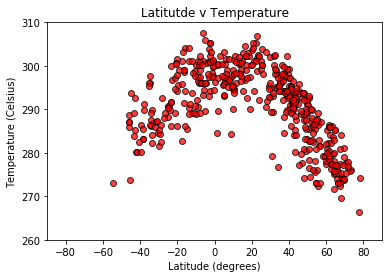

In [237]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = [final_city_df["Lat"]]

# Latitude data that we will use for our y values
y_axis = [final_city_df["MaxTemp"]]
y_limit = final_city_df["MaxTemp"].max()
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylim(260, 310)
plt.xlim(-x_limit, x_limit)
plt.title("Latitutde v Temperature")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (Celsius)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

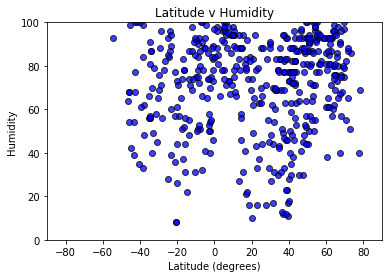

In [238]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = [final_city_df["Lat"]]

# Latitude data that we will use for our y values
y_axis = [final_city_df["Humidity"]]
y_limit = 100
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.ylim(0, y_limit)
plt.xlim(-x_limit, x_limit)
plt.title("Latitude v Humidity")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

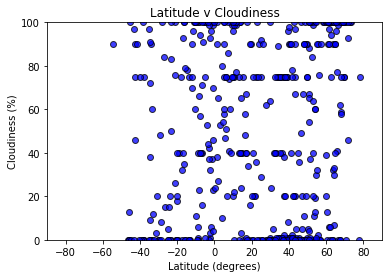

In [236]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = [final_city_df["Lat"]]

# Latitude data that we will use for our y values
y_axis = [final_city_df["Cloudiness"]]
y_limit = 100
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.ylim(0, y_limit)
plt.xlim(-x_limit, x_limit)
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

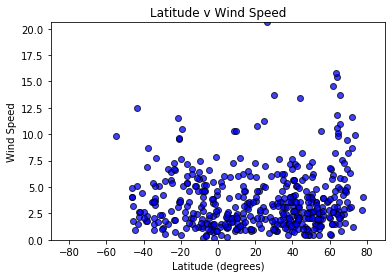

In [239]:
# The maximum x value for our chart will be 90 degrees
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = [final_city_df["Lat"]]

# Latitude data that we will use for our y values
y_axis = [final_city_df["WindSpeed"]]
y_limit = final_city_df["WindSpeed"].max()
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.ylim(0, y_limit)
plt.xlim(-x_limit, x_limit)
plt.title("Latitude v Wind Speed")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed")